In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
len(data)

788922

In [4]:
data.head(5)

,text,source,prompt_id,text_length,word_count
0,"Federal law supersedes state law, and cannabis...",Bloom-7B,0,967,157
1,Miles feels restless after working all day. He...,Bloom-7B,0,5068,778
2,So first of I am danish. That means that I fol...,Bloom-7B,0,1602,267
3,In this paper we present a novel rule-based ap...,Bloom-7B,0,5469,848
4,"Most social progressives, love democracy, and ...",Bloom-7B,0,2379,380


In [5]:
data.source.value_counts()

source
Human                       347692
GPT-3.5                      52346
Text-Davinci-003             22860
Text-Davinci-002             21436
OPT-1.3B                     18467
                             ...  
Toppy-M-7B                     433
LLaMA-2-7B                     409
Dolphin-Mixtral-8x7B           407
Cohere-Command                 390
Dolphin-2.5-Mixtral-8x7B       228
Name: count, Length: 63, dtype: int64

In [6]:
data.source.unique()

array(['Bloom-7B', 'Claude-Instant-v1', 'Claude-v1', 'Cohere-Command',
       'Dolphin-2.5-Mixtral-8x7B', 'Dolphin-Mixtral-8x7B', 'Falcon-180B',
       'Flan-T5-Base', 'Flan-T5-Large', 'Flan-T5-Small', 'Flan-T5-XL',
       'Flan-T5-XXL', 'GLM-130B', 'GPT-3.5', 'GPT-4', 'GPT-J', 'GPT-NeoX',
       'Gemini-Pro', 'Goliath-120B', 'Human', 'LLaMA-13B', 'LLaMA-2-70B',
       'LLaMA-2-7B', 'LLaMA-30B', 'LLaMA-65B', 'LLaMA-7B', 'LZLV-70B',
       'Mistral-7B', 'Mistral-7B-OpenOrca', 'Mixtral-8x7B',
       'MythoMax-L2-13B', 'Neural-Chat-7B', 'Noromaid-20B',
       'Nous-Capybara-34B', 'Nous-Capybara-7B', 'Nous-Hermes-LLaMA-2-13B',
       'Nous-Hermes-LLaMA-2-70B', 'OPT-1.3B', 'OPT-125M', 'OPT-13B',
       'OPT-2.7B', 'OPT-30B', 'OPT-350M', 'OPT-6.7B', 'OpenChat-3.5',
       'OpenHermes-2-Mistral-7B', 'OpenHermes-2.5-Mistral-7B', 'PaLM-2',
       'Psyfighter-13B', 'Psyfighter-2-13B', 'RWKV-5-World-3B',
       'StripedHyena-Nous-7B', 'T0-11B', 'T0-3B', 'Text-Ada-001',
       'Text-Babbage-001', 

In [7]:
data.source.value_counts()/len(data)

source
Human                       0.440718
GPT-3.5                     0.066351
Text-Davinci-003            0.028976
Text-Davinci-002            0.027171
OPT-1.3B                    0.023408
                              ...   
Toppy-M-7B                  0.000549
LLaMA-2-7B                  0.000518
Dolphin-Mixtral-8x7B        0.000516
Cohere-Command              0.000494
Dolphin-2.5-Mixtral-8x7B    0.000289
Name: count, Length: 63, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

Training set size: 631137
Test set size: 157785


Training set size: 504909
Val set size: 126228


In [22]:
data['text_length'].max()

890119

In [23]:
data[data['text_length'] == data['text_length'].max()]

,text,source,prompt_id,text_length,word_count
191180,Paper Recycling: Environmental and Business Is...,Human,0,890119,20083


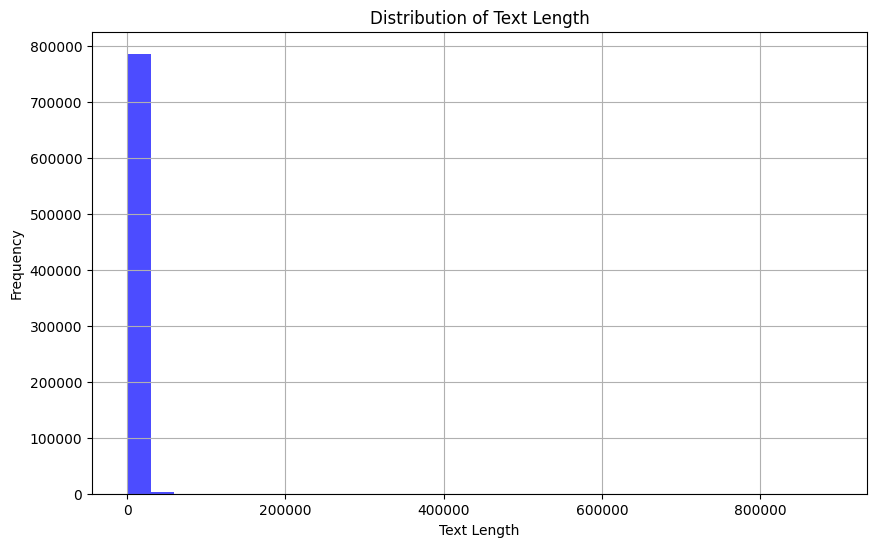

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(data['text_length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


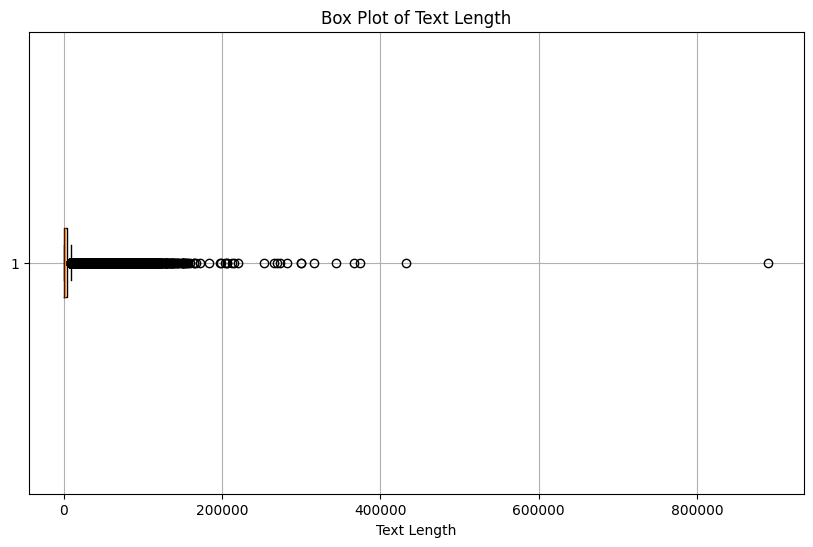

In [27]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['text_length'], vert=False)
plt.title('Box Plot of Text Length')
plt.xlabel('Text Length')
plt.grid(True)
plt.show()


In [28]:
data['text_length'].describe()

count    788922.000000
mean       3123.374844
std        4963.074433
min         105.000000
25%         647.000000
50%        1921.000000
75%        3910.000000
max      890119.000000
Name: text_length, dtype: float64

In [29]:
percentile_95 = data['text_length'].quantile(0.95)
print("The 95th percentile of text length is:", percentile_95)

The 95th percentile of text length is: 10134.0


In [30]:
data_fil = data[data['text_length'] <= 2000]

In [41]:
data_fil

,text,source,prompt_id,text_length,word_count
0,"Federal law supersedes state law, and cannabis...",Bloom-7B,0,967,157
2,So first of I am danish. That means that I fol...,Bloom-7B,0,1602,267
5,finally gets the fish up onto the ice and he s...,Bloom-7B,0,374,72
7,pulled back the lawn mower and then moved it f...,Bloom-7B,0,1818,328
9,"""AHHHHHH!"" I shrieked. The flames had erupted ...",Bloom-7B,0,1381,252
...,...,...,...,...,...
786818,\nA four-day work week with each day consistin...,YI-34B,5595,1093,169
786840,"\nIn the bustling heart of the digital age, wh...",YI-34B,6024,1974,314
787117,\nTitle: The Intersection of Climate Change an...,YI-34B,1356,1596,233
787121,\nThe influence of music on memory recall is a...,YI-34B,3941,1240,204


In [37]:
value_counts_series = data_fil['source'].value_counts()

# Convert to DataFrame
value_counts_df = value_counts_series.reset_index()
value_counts_df.columns = ['Unique_Value', 'Counts']  # Rename columns for clarity

print(value_counts_df)

                 Unique_Value  Counts
0                       Human  160275
1            Text-Davinci-003   21680
2                     GPT-3.5   20273
3            Text-Davinci-002   19549
4                     OPT-30B   14476
..                        ...     ...
58    Nous-Hermes-LLaMA-2-70B       4
59                 Toppy-M-7B       3
60  OpenHermes-2.5-Mistral-7B       2
61    OpenHermes-2-Mistral-7B       2
62   Dolphin-2.5-Mixtral-8x7B       2

[63 rows x 2 columns]


In [40]:
value_counts_df[value_counts_df['Counts'] >= 1000].unique

,Unique_Value,Counts
0,Human,160275
1,Text-Davinci-003,21680
2,GPT-3.5,20273
3,Text-Davinci-002,19549
4,OPT-30B,14476
5,OPT-1.3B,14078
6,T0-3B,9219
7,Flan-T5-Base,9182
8,Flan-T5-Large,9151
9,Flan-T5-Small,9141


In [44]:
filter_source_list=value_counts_df[value_counts_df['Counts'] >= 1000]['Unique_Value'].unique().tolist()

In [47]:
data_fin=data_fil[data_fil['source'].isin(filter_source_list)]

In [48]:
# Split the data into training and test sets
train_df, test_df = train_test_split(data_fin, test_size=0.2, random_state=42, stratify=data_fin['source'])

# Check the split
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")


Training set size: 316569
Test set size: 79143


In [49]:
# Split the data into training and test sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['source'])

# Check the split
print(f"Training set size: {len(train_df)}")
print(f"Val set size: {len(val_df)}")


Training set size: 253255
Val set size: 63314


In [50]:
train_df.to_csv('train_fil.csv')
val_df.to_csv('val_fil.csv')
test_df.to_csv('test_fil.csv')